## Korattur Lake Water Quality Prediction Application using PyCaret and StreamLit

#### By: Venki Ramachandran
#### Dated: 01-Apr-2022

**Description & Credits:** The dataset is from a Lake in Chennai, India and it was staged in github by Jahnavi Srividya. It can be found at https://github.com/JahnaviSrividya/Korattur-Lake-Water-Quality-Dataset. I followed the methodology outlined in the paper that can be found here: https://www.sciencedirect.com/science/article/abs/pii/S0013935121010148

This dataset has been sourced from the Korattur Lake that is located in Chennai, a south Indian metropolis. Deemed the largest it spans over 990 acres, supplying public drinking water for over eighteen years. The dataset contains observations of a ten-year period, ranging from 2019 to 2019. About 5000 records under 9 parameters are present. The parameters are Turbidity, TDS, COD, PH, Phosphate, Iron, Nitrate, Sodium and Chloride. The 5000 records broadly fall into two types, namely the binary and multi-class.

**Methodology:**
1. Load Data. Do EDA. 
2. Remove Outliers, Normalize the data and use SMOTE to make sure the two class predictor is balanced.
3. I plan to use Random Forest, K Nearest Beighbor, Naive Bayes and get some results. Measure accuracy. Pick the best one from the above
4. Deploy the above using Streamlit so that external users can connect and test the data.



In [63]:
# Load all the libraries needed
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [64]:
# Load the Dataset
df = pd.read_csv("Korattur-Lake-Water-Quality-BinaryClass-Dataset.csv")
df

,pH,TDS,Turbidity,Phospate,Nitrate,Iron,COD(mg/L),Chlorine,Sodium,Class
0,7.600000,877,3.59,0.026136,8,0.378500,397,4,8,1
1,7.600000,729,1.75,0.020622,6,0.333759,397,3,9,1
2,7.500000,622,3.44,0.004071,7,0.382368,394,4,16,0
3,7.600000,864,2.80,0.022071,7,0.313915,403,2,5,0
4,7.600000,656,1.81,0.004031,7,0.333226,421,4,11,0
...,...,...,...,...,...,...,...,...,...,...
4995,7.518544,717,2.34,0.014952,6,0.377223,428,3,11,0
4996,7.595310,977,3.48,0.011784,8,0.330427,391,3,10,0
4997,7.525957,800,2.52,0.012021,8,0.324900,395,1,9,1
4998,7.500962,742,3.34,0.006602,7,0.359268,397,2,2,1


In [65]:
df.describe()

,pH,TDS,Turbidity,Phospate,Nitrate,Iron,COD(mg/L),Chlorine,Sodium,Class
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,7.549939,799.579000,2.152730,0.014942,7.011800,0.354612,410.322000,2.499800,10.454800,0.135000
std,0.029937,103.505337,1.185827,0.008606,0.819387,0.032074,11.838967,1.112406,5.848453,0.341758
min,7.400000,622.000000,0.100000,0.000010,6.000000,0.300013,390.000000,1.000000,1.000000,0.000000
25%,7.524666,710.000000,1.120000,0.007595,6.000000,0.326686,400.000000,2.000000,5.000000,0.000000
50%,7.549351,799.000000,2.140000,0.014884,7.000000,0.354054,410.000000,3.000000,10.000000,0.000000
75%,7.575878,888.000000,3.210000,0.022372,8.000000,0.382779,421.000000,3.000000,16.000000,0.000000
max,7.600000,979.000000,4.200000,0.029996,8.000000,0.409980,430.000000,4.000000,20.000000,1.000000


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pH         5000 non-null   float64
 1   TDS        5000 non-null   int64  
 2   Turbidity  5000 non-null   float64
 3   Phospate   5000 non-null   float64
 4   Nitrate    5000 non-null   int64  
 5   Iron       5000 non-null   float64
 6   COD(mg/L)  5000 non-null   int64  
 7   Chlorine   5000 non-null   int64  
 8   Sodium     5000 non-null   int64  
 9   Class      5000 non-null   int64  
dtypes: float64(4), int64(6)
memory usage: 390.8 KB


<AxesSubplot:>

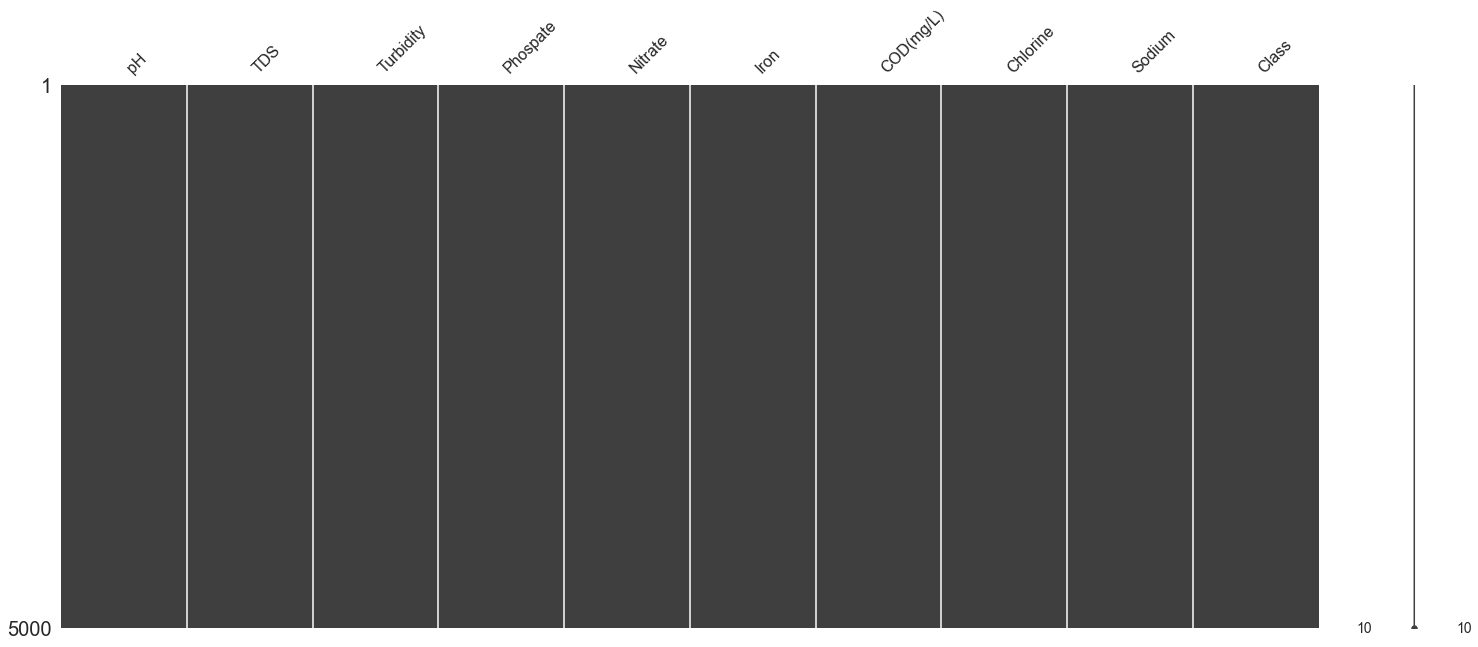

In [67]:
!pip install missingno

import missingno as msno
msno.matrix(df)

#### Looks like nothing is missing. Good

In [68]:
# Double Check
df.isna().sum()

pH           0
TDS          0
Turbidity    0
Phospate     0
Nitrate      0
Iron         0
COD(mg/L)    0
Chlorine     0
Sodium       0
Class        0
dtype: int64

In [69]:
# Rename the predictor column
df = df.rename({'Class': 'Potability'}, axis=1)  # new method
df = df.rename({'COD(mg/L)': 'COD-mg/L'}, axis=1)  # new method

Correlation to 'Potability' value:
Potability    1.000000
COD-mg/L     -0.523545
TDS          -0.137971
Phospate      0.102767
Iron         -0.055308
Chlorine      0.022960
Nitrate       0.019312
Sodium       -0.017113
pH           -0.008583
Turbidity     0.005295
Name: Potability, dtype: float64


Text(0.5, 1.0, 'Water Potability Heatmap')

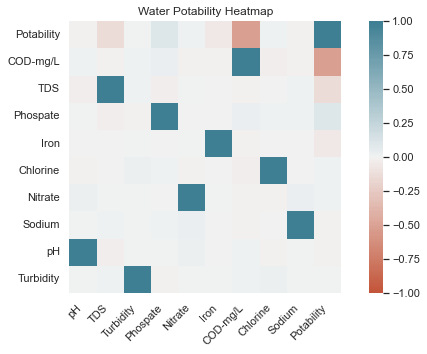

In [70]:
# Visualize the data and its corelation to the predictor column Çlass

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot as plt

sns.set(rc={'figure.figsize':(10,5)})
corr = df.corr().sort_values(ascending=False, key=lambda x: abs(x), by="Potability")

print("Correlation to 'Potability' value:")
print (corr["Potability"])

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_title("Water Potability Heatmap")

#### COD has the max negative corelation, followed by TDS and Iron. Phosphate has a positive corelation to Potability

Text(0.5, 1.0, 'Water distribution by potability')

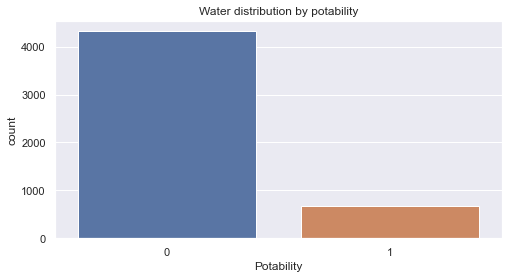

In [71]:
# Let us do some Exploratory data analysis and plot some chasrts to do univariate and bivariate analysis
sns.set(rc={'figure.figsize':(8,4)})
sns.countplot(x="Potability", data=df).set_title("Water distribution by potability")

In [72]:
# Remove outliers in one shot
from scipy import stats
df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

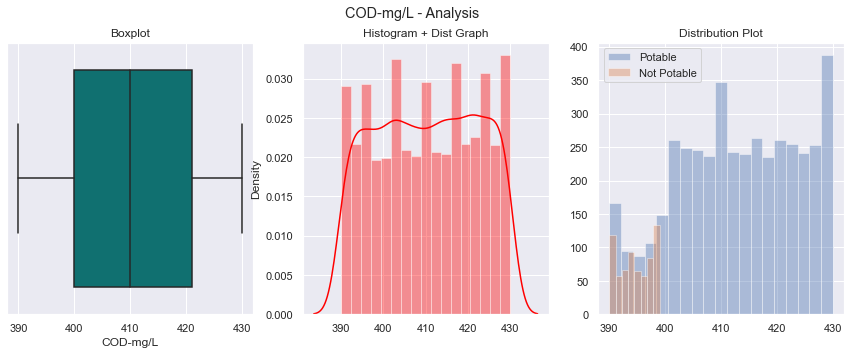

In [73]:
# COD(mg/L)
# The COD concentrations observed in surface water resources typically range from 20 mg/L or less in unpolluted waters to 
# greater than 200 mg/L in waters receiving effluents. 
# Industrial wastewaters may have COD ranging from 100 mg/L to 60,000 mg/L (Chapman 1992).
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('COD-mg/L - Analysis')

sns.boxplot(ax=axes[0], x=df['COD-mg/L'], color='teal').set(title='Boxplot')
sns.distplot(ax=axes[1], x=df['COD-mg/L'], color='red').set(title='Histogram + Dist Graph')
sns.distplot(ax=axes[2], x=df[df["Potability"] == 0]['COD-mg/L'],  kde=False, label="Potable").set(title='Distribution Plot')
sns.distplot(ax=axes[2], x=df[df["Potability"] == 1]['COD-mg/L'],  kde=False, label="Not Potable")
plt.legend()

All values of COD (mg/L) is between 390 and 430 which is very high. Not sure how any of these row can be tagged as potable

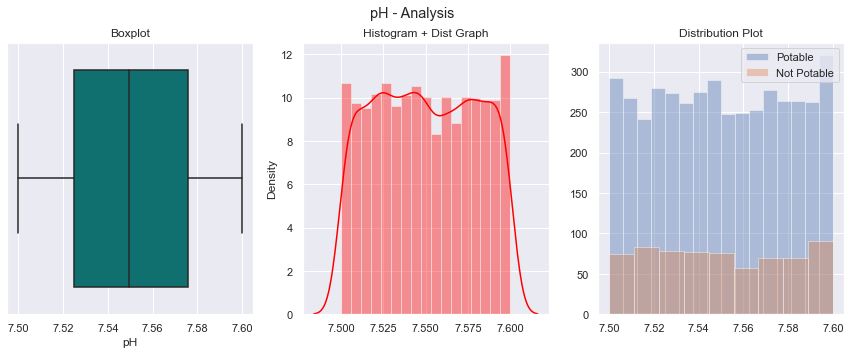

In [74]:
# PH
# PH is an important parameter in evaluating the acid–base balance of water. It is also the indicator of acidic or alkaline 
# condition of water status. WHO has recommended maximum permissible limit of pH from 6.5 to 8.5. 
# The current investigation ranges were 6.52–6.83 which are in the range of WHO standards
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('pH - Analysis')

sns.boxplot(ax=axes[0], x=df.pH, color='teal').set(title='Boxplot')
sns.distplot(ax=axes[1], x=df.pH, color='red').set(title='Histogram + Dist Graph')
sns.distplot(ax=axes[2], x=df[df["Potability"] == 0]['pH'],  kde=False, label="Potable").set(title='Distribution Plot')
sns.distplot(ax=axes[2], x=df[df["Potability"] == 1]['pH'],  kde=False, label="Not Potable")
plt.legend()

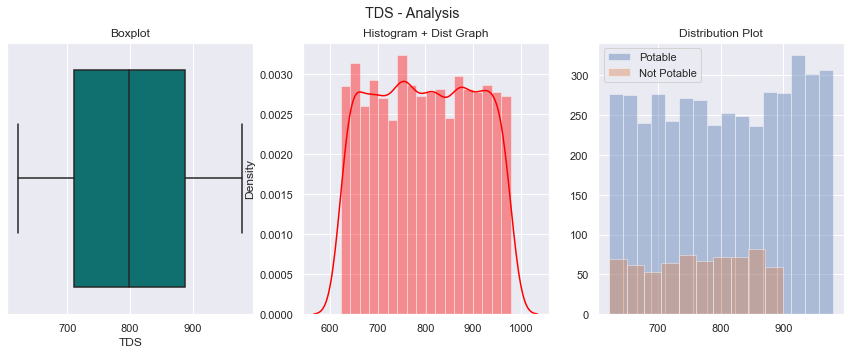

In [75]:
# TDS
# Total dissolved solids (TDS) is the term used to describe the inorganic salts and small amounts of organic matter present 
# in solution in water. The principal constituents are usually 
# calcium, magnesium, sodium, and potassium cations and carbonate, hydrogencarbonate, chloride, sulfate, and nitrate anions
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('TDS - Analysis')

sns.boxplot(ax=axes[0], x=df.TDS, color='teal').set(title='Boxplot')
sns.distplot(ax=axes[1], x=df.TDS, color='red').set(title='Histogram + Dist Graph')
sns.distplot(ax=axes[2], x=df[df["Potability"] == 0]['TDS'],  kde=False, label="Potable").set(title='Distribution Plot')
sns.distplot(ax=axes[2], x=df[df["Potability"] == 1]['TDS'],  kde=False, label="Not Potable")
plt.legend()

TDS level between 50-150 is considered as the most suitable and acceptable. The TDS values are between 700 - 900. Very bad

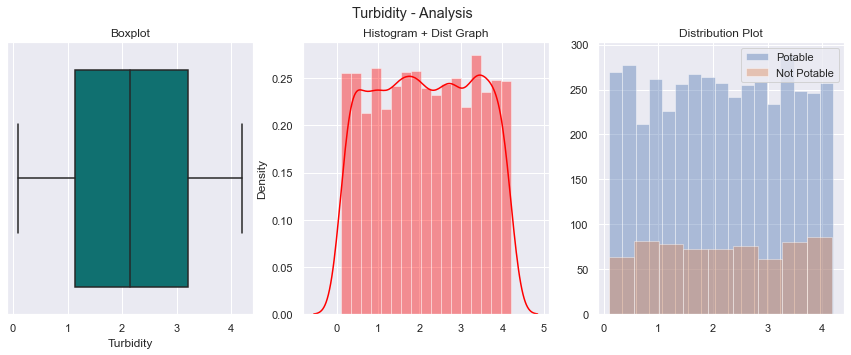

In [76]:
# Turbidity
# The turbidity of water depends on the quantity of solid matter present in the suspended state. It is a measure of 
# light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to 
# colloidal matter. The mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than 
# the WHO recommended value of 5.00 NTU.
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Turbidity - Analysis')

sns.boxplot(ax=axes[0], x=df.Turbidity, color='teal').set(title='Boxplot')
sns.distplot(ax=axes[1], x=df.Turbidity, color='red').set(title='Histogram + Dist Graph')
sns.distplot(ax=axes[2], x=df[df["Potability"] == 0]['Turbidity'],  kde=False, label="Potable").set(title='Distribution Plot')
sns.distplot(ax=axes[2], x=df[df["Potability"] == 1]['Turbidity'],  kde=False, label="Not Potable")
plt.legend()

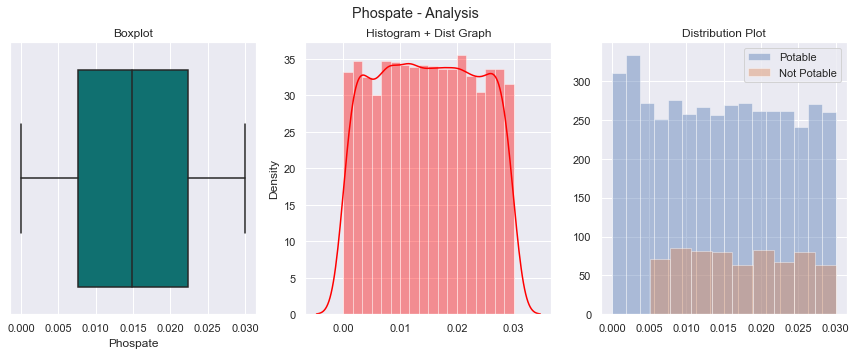

In [77]:
# Phosphate
# In 1986, the Environmental Protection Agency (EPA) established the following recommended criteria for phosphorus: 
# No more than 0.1 mg/L for streams that do not empty into reservoirs; no more than 0.05 mg/L for streams 
# discharging into reservoirs; and no more than 0.024 mg/L for reservoirs.
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Phospate - Analysis')

sns.boxplot(ax=axes[0], x=df.Phospate, color='teal').set(title='Boxplot')
sns.distplot(ax=axes[1], x=df.Phospate, color='red').set(title='Histogram + Dist Graph')
sns.distplot(ax=axes[2], x=df[df["Potability"] == 0]['Phospate'],  kde=False, label="Potable").set(title='Distribution Plot')
sns.distplot(ax=axes[2], x=df[df["Potability"] == 1]['Phospate'],  kde=False, label="Not Potable")
plt.legend()

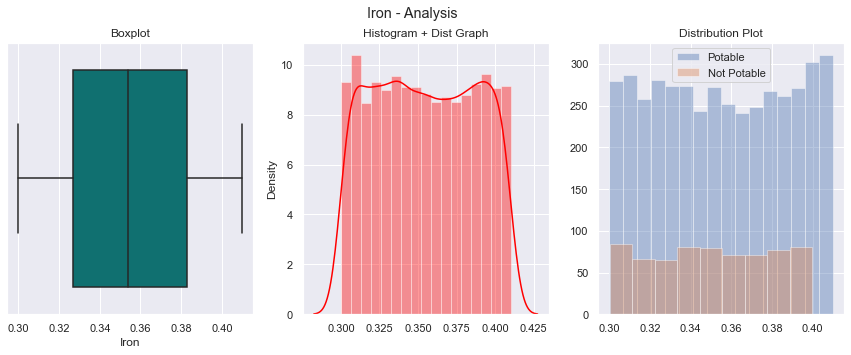

In [78]:
# Iron
# The present recommended limit for iron in water, 0.3 mg/l (ppm), is based on taste and appearance rather than on any 
# detrimental health effect. 
# Private water supplies are not subject to the rules, but the guidelines can be used to evaluate water quality.
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Iron - Analysis')

sns.boxplot(ax=axes[0], x=df.Iron, color='teal').set(title='Boxplot')
sns.distplot(ax=axes[1], x=df.Iron, color='red').set(title='Histogram + Dist Graph')
sns.distplot(ax=axes[2], x=df[df["Potability"] == 0]['Iron'],  kde=False, label="Potable").set(title='Distribution Plot')
sns.distplot(ax=axes[2], x=df[df["Potability"] == 1]['Iron'],  kde=False, label="Not Potable")
plt.legend()

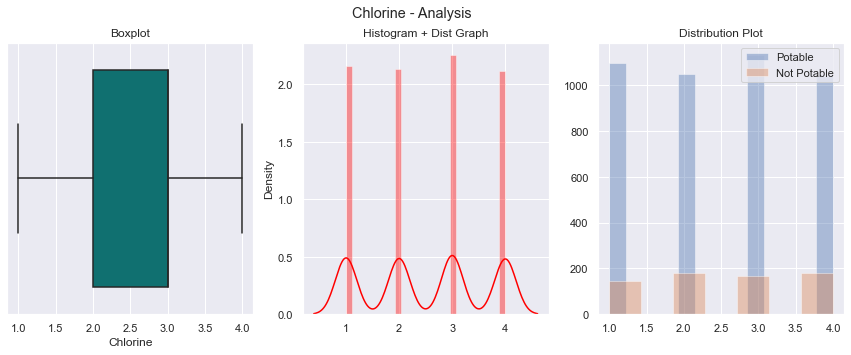

In [79]:
# Chlorine      
# Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water . 
# At this level, harmful health effects are unlikely to occur.
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Chlorine - Analysis')

sns.boxplot(ax=axes[0], x=df.Chlorine, color='teal').set(title='Boxplot')
sns.distplot(ax=axes[1], x=df.Chlorine, color='red').set(title='Histogram + Dist Graph')
sns.distplot(ax=axes[2], x=df[df["Potability"] == 0]['Chlorine'],  kde=False, label="Potable").set(title='Distribution Plot')
sns.distplot(ax=axes[2], x=df[df["Potability"] == 1]['Chlorine'],  kde=False, label="Not Potable")
plt.legend()

Looks like the Chlorine column takes only 4 values = 1,2,3,4

In [80]:
df['Chlorine'].value_counts()

3    1297
1    1244
2    1231
4    1221
Name: Chlorine, dtype: int64

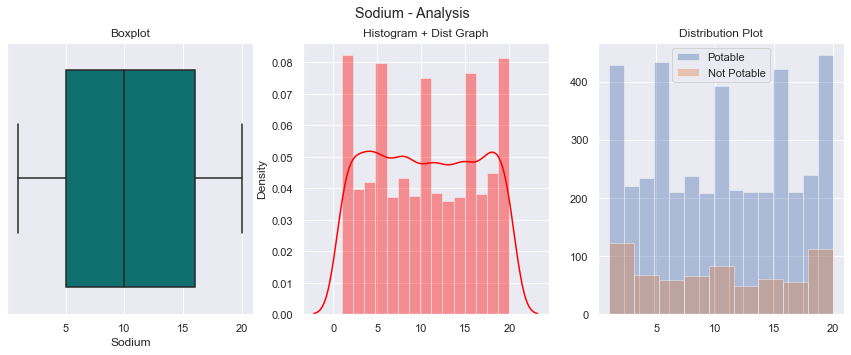

In [81]:
# Sodium      
# While there is no drinking water standard for sodium, state and federal agencies recommend sodium levels in 
# water not exceed 20 milligrams per liter (mg/L) for people on very 
# low sodium diets and 270 mg/L for people on moderately restricted sodium diets. Most of the salt we consume comes from food.
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Sodium - Analysis')

sns.boxplot(ax=axes[0], x=df.Sodium, color='teal').set(title='Boxplot')
sns.distplot(ax=axes[1], x=df.Sodium, color='red').set(title='Histogram + Dist Graph')
sns.distplot(ax=axes[2], x=df[df["Potability"] == 0]['Sodium'],  kde=False, label="Potable").set(title='Distribution Plot')
sns.distplot(ax=axes[2], x=df[df["Potability"] == 1]['Sodium'],  kde=False, label="Not Potable")
plt.legend()

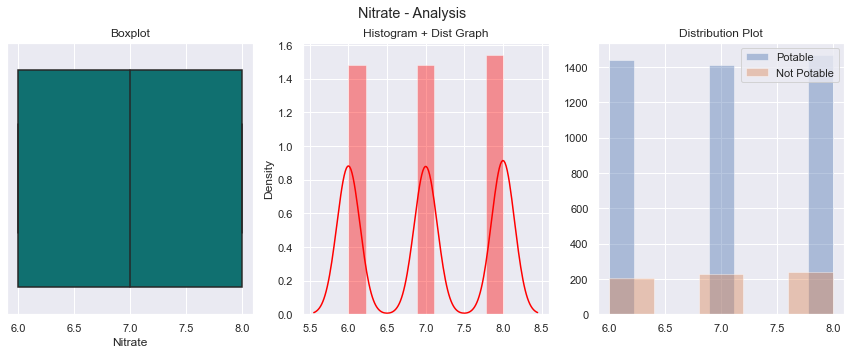

In [82]:
# Nitrate      
# The U.S. Environmental Protection Agency (EPA) standard for nitrate in drinking water is 10 milligrams of nitrate 
# (measured as nitrogen) per liter of drinking water (mg/L). 
# Drinking water with levels of nitrate at or below 10 mg/L is considered safe for everyone.
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Nitrate - Analysis')

sns.boxplot(ax=axes[0], x=df.Nitrate, color='teal').set(title='Boxplot')
sns.distplot(ax=axes[1], x=df.Nitrate, color='red').set(title='Histogram + Dist Graph')
sns.distplot(ax=axes[2], x=df[df["Potability"] == 0]['Nitrate'],  kde=False, label="Potable").set(title='Distribution Plot')
sns.distplot(ax=axes[2], x=df[df["Potability"] == 1]['Nitrate'],  kde=False, label="Not Potable")
plt.legend()

In [83]:
df['Nitrate'].value_counts()

8    1706
6    1646
7    1641
Name: Nitrate, dtype: int64

### Normalization

In [84]:
df.head()

,pH,TDS,Turbidity,Phospate,Nitrate,Iron,COD-mg/L,Chlorine,Sodium,Potability
0,7.6,877,3.59,0.026136,8,0.378500,397,4,8,1
1,7.6,729,1.75,0.020622,6,0.333759,397,3,9,1
2,7.5,622,3.44,0.004071,7,0.382368,394,4,16,0
3,7.6,864,2.80,0.022071,7,0.313915,403,2,5,0
4,7.6,656,1.81,0.004031,7,0.333226,421,4,11,0


In [85]:
data = df.copy(deep=True)
data.head()

,pH,TDS,Turbidity,Phospate,Nitrate,Iron,COD-mg/L,Chlorine,Sodium,Potability
0,7.6,877,3.59,0.026136,8,0.378500,397,4,8,1
1,7.6,729,1.75,0.020622,6,0.333759,397,3,9,1
2,7.5,622,3.44,0.004071,7,0.382368,394,4,16,0
3,7.6,864,2.80,0.022071,7,0.313915,403,2,5,0
4,7.6,656,1.81,0.004031,7,0.333226,421,4,11,0


In [86]:
# Normalize

def do_normalization(df, col):
    df[col] = [ (i-df[col].min())/(df[col].max()-df[col].min()) for i in df[col]]

columns_to_normalize = ['pH', 'TDS', 'Turbidity', 'Phospate', 'Iron', 'Chlorine',
       'COD-mg/L', 'Sodium', 'Nitrate']

for column in columns_to_normalize:
    do_normalization(data, column)
    
    
data.head()

,pH,TDS,Turbidity,Phospate,Nitrate,Iron,COD-mg/L,Chlorine,Sodium,Potability
0,1.0,0.714286,0.851220,0.871275,1.0,0.713738,0.175,1.000000,0.368421,1
1,1.0,0.299720,0.402439,0.687369,0.0,0.306881,0.175,0.666667,0.421053,1
2,0.0,0.000000,0.814634,0.135415,0.5,0.748914,0.100,1.000000,0.789474,0
3,1.0,0.677871,0.658537,0.735715,0.5,0.126420,0.325,0.333333,0.210526,0
4,1.0,0.095238,0.417073,0.134096,0.5,0.302032,0.775,1.000000,0.526316,0


In [87]:
# SMOTE to fix imbalance. There are a lot of rows with Potability set = 0 and a very few set = 1
# SMOTE (synthetic minority oversampling technique) is one of the most commonly used oversampling methods to solve the 
# imbalance problem. It aims to balance class distribution by randomly increasing minority class examples by replicating them. 
# SMOTE synthesises new minority instances between existing minority instances.
#Installing imblearn
#!pip install -U imbalanced-learn

### Before SMOTE analysis to create artificial rows, check the count

In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4993 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          4993 non-null   float64
 1   TDS         4993 non-null   float64
 2   Turbidity   4993 non-null   float64
 3   Phospate    4993 non-null   float64
 4   Nitrate     4993 non-null   float64
 5   Iron        4993 non-null   float64
 6   COD-mg/L    4993 non-null   float64
 7   Chlorine    4993 non-null   float64
 8   Sodium      4993 non-null   float64
 9   Potability  4993 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 429.1 KB


In [89]:
#Importing SMOTE
from imblearn.over_sampling import SMOTE
#Oversampling the data
smote = SMOTE(random_state = 101)
X, y = smote.fit_resample(data[['pH', 'TDS', 'Turbidity', 'Phospate', 'Iron', 'Chlorine',
       'COD-mg/L', 'Sodium', 'Nitrate']], data['Potability'])

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8638 entries, 0 to 8637
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pH         8638 non-null   float64
 1   TDS        8638 non-null   float64
 2   Turbidity  8638 non-null   float64
 3   Phospate   8638 non-null   float64
 4   Iron       8638 non-null   float64
 5   Chlorine   8638 non-null   float64
 6   COD-mg/L   8638 non-null   float64
 7   Sodium     8638 non-null   float64
 8   Nitrate    8638 non-null   float64
dtypes: float64(9)
memory usage: 607.5 KB


In [90]:
y.count()

8638

<AxesSubplot:xlabel='Potability', ylabel='count'>

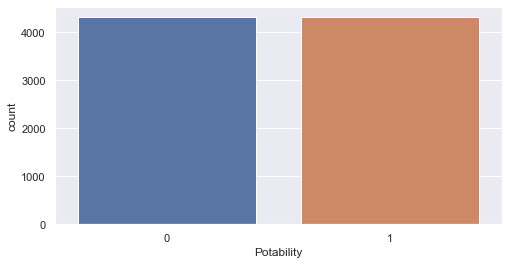

In [91]:
#Same number of rows = 8638
# Creating a new Oversampling Data Frame
df_oversampler = pd.DataFrame(X, columns = ['pH', 'TDS', 'Turbidity', 'Phospate', 'Iron', 'Chlorine',
       'COD-mg/L', 'Sodium', 'Nitrate'])
df_oversampler['Potability'] = y
sns.countplot(df_oversampler['Potability'])

In [92]:
df_oversampler.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8638 entries, 0 to 8637
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          8638 non-null   float64
 1   TDS         8638 non-null   float64
 2   Turbidity   8638 non-null   float64
 3   Phospate    8638 non-null   float64
 4   Iron        8638 non-null   float64
 5   Chlorine    8638 non-null   float64
 6   COD-mg/L    8638 non-null   float64
 7   Sodium      8638 non-null   float64
 8   Nitrate     8638 non-null   float64
 9   Potability  8638 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 675.0 KB


#### We see that the total number of rows in the data frame has become 8638 from 4993. The artificial rows were all Potability == 1

In [93]:
df_oversampler['Potability'].value_counts()

1    4319
0    4319
Name: Potability, dtype: int64

### Now that we have removed outliers, normalized the data and used SMOTE to balance the predictor class, we are ready to develop the model.

In [94]:
# Let us try a K Nearest Neighbors Classifier
# Split the dataset into X and Y
X = df_oversampler.iloc[:, :-1].values
y = df_oversampler.iloc[:, -1].values

print("X Shape:", X.shape)
print("y Shape:", y.shape)

X Shape: (8638, 9)
y Shape: (8638,)


In [95]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state=1)

In [96]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3) # n_neighbors = k
knn.fit(X_train,y_train)
prediction = knn.predict(X_test)
print(" {} nn score: {} ".format(3,knn.score(X_test,y_test)))

 3 nn score: 0.9193672839506173 


### We got a 91.9% accuracy with 3 Nearest Neighbor Classifier

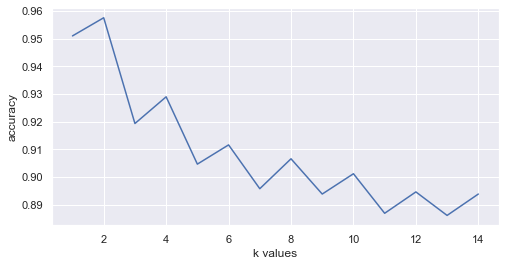

In [97]:
# Let us try to see what the ideal value of K should be
score_list = []
for each in range(1,15):
    knn2 = KNeighborsClassifier(n_neighbors = each)
    knn2.fit(X_train,y_train)
    score_list.append(knn2.score(X_test,y_test))
    
plt.plot(range(1,15),score_list)
plt.xlabel("k values")
plt.ylabel("accuracy")
plt.show()

K == 2 seems to be the best value

In [98]:
# Now with two (2) neighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2) # n_neighbors = k
knn.fit(X_train,y_train)
prediction = knn.predict(X_test)
print(" {} nn score: {} ".format(3,knn.score(X_test,y_test)))

 3 nn score: 0.9575617283950617 


### The accuracy increased to 95.75%

In [99]:
# Naive Bayes
# training the NB model and making predictions
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()

# fit
mnb.fit(X_train,y_train)

# predict class
y_pred_class = mnb.predict(X_test)

# predict probabilities
y_pred_proba = mnb.predict_proba(X_test)

In [100]:
# note that alpha=1 is used by default for smoothing
mnb

MultinomialNB()

In [101]:
# printing the overall accuracy
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

0.8888888888888888

In [102]:
# confusion matrix
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion)

[[1090  209]
 [  79 1214]]


In [103]:
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
TP = confusion[1, 1]

sensitivity = TP / float(FN + TP)
print("sensitivity",sensitivity)

sensitivity 0.9389017788089714


In [104]:
specificity = TN / float(TN + FP)
print("specificity",specificity)

specificity 0.8391070053887606


In [105]:
precision = TP / float(TP + FP)
print("precision ", metrics.precision_score(y_test, y_pred_class))

precision  0.8531271960646521


In [106]:

print("PRECISION SCORE :",metrics.precision_score(y_test, y_pred_class))
print("RECALL SCORE :", metrics.recall_score(y_test, y_pred_class))
print("F1 SCORE :",metrics.f1_score(y_test, y_pred_class))

PRECISION SCORE : 0.8531271960646521
RECALL SCORE : 0.9389017788089714
F1 SCORE : 0.8939617083946981


In [107]:
# creating an ROC curve
from sklearn.metrics import confusion_matrix as sk_confusion_matrix
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)

In [108]:
# area under the curve
print (roc_auc)

0.9449990384655458


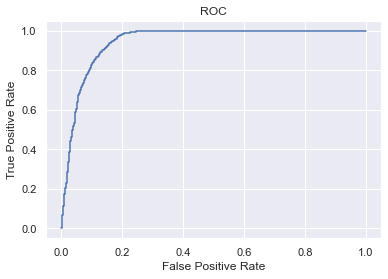

In [109]:
# plotting the ROC curve
%matplotlib inline  
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate)

### Random Forest Classifier gave the best accuracy we will use that for the app demo

In [110]:
# Split the dataset into X and Y
X = df_oversampler.iloc[:, :-1].values
y = df_oversampler.iloc[:, -1].values

print("X Shape:", X.shape)
print("y Shape:", y.shape)

X Shape: (8638, 9)
y Shape: (8638,)


In [111]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [112]:
# Let us use a Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [113]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [1 1]]


In [114]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("the accuracy is",accuracy_score(y_test, y_pred))

[[867   0]
 [  1 860]]
the accuracy is 0.9994212962962963


### We got a 99.9% accuracy with Random Forest Classifier

In [115]:
# Naive Bayes
# training the NB model and making predictions
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()

# fit
mnb.fit(X_train,y_train)

# predict class
y_pred_class = mnb.predict(X_test)

# predict probabilities
y_pred_proba = mnb.predict_proba(X_test)

In [116]:
import os
import joblib
# save
joblib.dump(mnb, "./mnb.joblib")

['./mnb.joblib']

In [131]:
df.head()

,pH,TDS,Turbidity,Phospate,Nitrate,Iron,COD-mg/L,Chlorine,Sodium,Potability
0,7.6,877,3.59,0.026136,8,0.378500,397,4,8,1
1,7.6,729,1.75,0.020622,6,0.333759,397,3,9,1
2,7.5,622,3.44,0.004071,7,0.382368,394,4,16,0
3,7.6,864,2.80,0.022071,7,0.313915,403,2,5,0
4,7.6,656,1.81,0.004031,7,0.333226,421,4,11,0


In [133]:
# load the saved model
# no need to initialize the loaded_rf
model = joblib.load("./random_forest.joblib")

In [134]:
def predict_quality(model, df):
    
    predictions_data = model.predict(df)
    return predictions_data[0]
    

In [136]:
# Before using StreamLit, try the prediction here
features = {
            'pH Value': 7.6, 'TDS': 877, 'Turbidity': 3.6, 
            'Phospate': 0.026 , 'Nitrate': 6, 'Iron': 0.34, 
            'COD-mg/L': 397, 'Chlorine': 4, 'Sodium': 8
            }
 

features_df  = pd.DataFrame([features])
#print(features_df)
 
prediction = predict_quality(model, features_df)
#print(prediction)

if prediction == 0:
    res = 'Potable'
else:
    res = 'Not Drinkable'
    
print(' Based on feature values, your water quality is '+ str(res))

 Based on feature values, your water quality is Potable


In [ ]:
# 7.600000	979.000000	4.200000	0.029996	8.000000	0.409980	430.000000	4.000000	20.000000	

In [57]:
import streamlit as st

# Streamlit Code
st.title('Water Quality Classifier Web App')
st.subheader('Water Quality Data from Korattur Lake was taken and a Random Forest Classifier built to predict!!')
st.write(
    "This is a web app to classify the quality of water based on\n"
    "several features that you can see in the sidebar. Please adjust the\n"
    "value of each feature. After that, click on the Predict button at the bottom to\n"
    "see the prediction of the classifier.\n\n"
    "Developed By: Venki Ramachandran on 12-March-2022."
)


# Next, we need to let the user to specify the value of our features. Since our features are all numeric features, it will be best to represent them with a slider widget. To create a slider widget, we can use slider() function from Streamlit
# Allow the user to select new features for prediction
pH = st.sidebar.slider(label = 'pH Value', min_value = 5.5,
                          max_value = 7.6 ,
                          value = 7.55,
                          step = 0.1)

TDS = st.sidebar.slider(label = 'TDS', min_value = 600,
                          max_value = 950 ,
                          value = 800,
                          step = 10)
                          
Turbidity = st.sidebar.slider(label = 'Turbidity', min_value = 1,
                          max_value = 3 ,
                          value = 2,
                          step = 1)                          

Phospate = st.sidebar.slider(label = 'Phospate', min_value = 0.005,
                          max_value = 0.025 ,
                          value = 0.015,
                          step = 0.005)

Iron = st.sidebar.slider(label = 'Iron', min_value = 0.32,
                          max_value = 0.4 ,
                          value = 0.35,
                          step = 0.01)
   
Chlorine = st.sidebar.slider(label = 'Chlorine', min_value = 2,
                          max_value = 4,
                          value = 3,
                          step = 1)

COD = st.sidebar.slider(label = 'COD-mg/L', min_value = 400,
                          max_value = 420 ,
                          value = 410,
                          step = 5)

Sodium = st.sidebar.slider(label = 'Sodium', min_value = 5,
                          max_value = 15,
                          value = 10,
                          step = 1)

Nitrate = st.sidebar.slider(label = 'Nitrate', min_value = 6,
                          max_value = 8,
                          value = 6,
                          step = 1)
 


# Next we need to convert all of those user input values into a dataframe. Then, we can use the dataframe as the input of our model’s prediction
features = {
            'pH Value': pH, 'TDS': TDS,
            'Turbidity': Turbidity, 'Phospate': Phospate,
            'Iron': Iron, 'Chlorine': Chlorine,
            'COD-mg/L': COD, 'Sodium': Sodium, 'Nitrate': Nitrate
            }
 

features_df  = pd.DataFrame([features])

st.table(features_df)  

if st.button('Predict'):
    
    prediction = predict_quality(loaded_rf_classifier, features_df)
    if prediction == 0:
        res = 'Potable'
    else:
        res = 'Not Drinkable'
    
    st.write(' Based on feature values, your water quality is '+ str(res))

